In [ ]:
import json
import os
from PIL import Image

def process_json_files(path):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            json_file_path = os.path.join(path, filename)
            with open(json_file_path, 'r') as file:
                data = json.load(file)

            # hc 라벨이 있는지 확인
            hc_labels = [shape for shape in data['shapes'] if shape['label'] == 'hc']
            
            if len(hc_labels):
                hc_labels = [hc_labels[0]]
            
            if hc_labels:
                process_hc_labels(hc_labels, data, path, filename)
                
def process_hc_labels(hc_labels, data, path, json_filename):
    image_path = os.path.join(path, data['imagePath'])
    image = Image.open(image_path)

    # x의 최소, 최대 좌표와 y의 최소 좌표를 구하기
    x_min = min(hc_label['points'][0][0] for hc_label in hc_labels)
    x_max = max(hc_label['points'][1][0] for hc_label in hc_labels)
    y_min = min(hc_label['points'][0][1] for hc_label in hc_labels) - 100

    # 이미지 자르기
    cropped_image = image.crop((0, y_min, image.size[0], image.size[1]))

    # 좌표 수정
    for hc_label in hc_labels:
        hc_label['points'][0][1] -= y_min
        hc_label['points'][1][1] -= y_min
        hc_label['points'][0][0] = 0
        hc_label['points'][1][0] = image.size[0]

    # 새로운 이미지명으로 저장
    new_image_name = f"{os.path.splitext(data['imagePath'])[0]}_1.png"
    
    new_path = "/Users/gwonsmpro/Desktop/hc_test_folder"
    # cropped_image.save(os.path.join(path, new_image_name))
    cropped_image.save(os.path.join(new_path, new_image_name))
    
    # JSON 파일 업데이트
    new_json_data = {
        "version": data["version"],
        "flags": data["flags"],
        "shapes": hc_labels,
        "imagePath": new_image_name,
        "imageData": None,
        "imageWidth": cropped_image.size[0],
        "imageHeight": cropped_image.size[1]
    }

    # 새로운 JSON 파일로 저장
    new_json_file_name = os.path.splitext(json_filename)[0] + "_1.json"
    with open(os.path.join(new_path, new_json_file_name), 'w') as file:
        json.dump(new_json_data, file)

In [ ]:
os_list = [cls for cls in os.listdir("/Users/gwonsmpro/Downloads/pillipse/test_hc/") if os.path.isdir(os.path.join("/Users/gwonsmpro/Downloads/pillipse/test_hc/",cls))]

for cls in os_list:
    process_json_files(f"/Users/gwonsmpro/Downloads/pillipse/test_hc/{cls}")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

img = cv2.imread('/Users/gwonsmpro/Documents/GitHub/Utils/testfolder/bcd_0.png', cv2.IMREAD_GRAYSCALE)

projection = np.sum(img, axis=0, dtype=np.int64)
peak_v = np.diff(projection)

first_min = peak_v.argmin()
first_max = peak_v.argmax()

second_smallest_value = np.partition(peak_v.flatten(), 1)[1]
index_second_smallest = np.where(peak_v == second_smallest_value)
second_largest_value = np.partition(peak_v.flatten(), -2)[-2]
index_second_largest = np.where(peak_v == second_largest_value)
# plt.figure(figsize = [5,5])
plt.plot(projection)
plt.vlines(first_min, projection.min(), projection.max(),'red', '--')
plt.vlines(first_max, projection.min(), projection.max(),'blue', '--')
plt.vlines(index_second_smallest, projection.min(), projection.max(),'red', '--')
plt.vlines(index_second_largest, projection.min(), projection.max(),'blue', '--')
plt.show()

# image
# plt.figure(figsize = [5,5])
plt.imshow(img)
plt.show()

projection_h = np.sum(img, axis=1, dtype=np.int64)
peak_h = np.diff(projection_h)

# plt.figure(figsize = [5,5])
plt.plot(projection_h, range(len(projection_h)))
plt.hlines(peak_h.argmin(), projection_h.min(), projection_h.max(), 'red', '--')
plt.hlines(peak_h.argmax(), projection_h.min(), projection_h.max(), 'blue', '--')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

peak_h.argmin()
img = cv2.imread('/Users/gwonsmpro/Documents/GitHub/Utils/testfolder/bcd_4.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
crop_image = image[peak_h.argmin()-100:peak_h.argmax(), :]



crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)

print(crop_image.shape)
crop_image = cv2.resize(crop_image, (crop_image.shape[1],crop_image.shape[0]*10))

# Otsu의 이진화 적용
_, binary_image = cv2.threshold(crop_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(crop_image)
plt.show()

# RGB에서 HSV로 변환
# hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


plt.imshow(binary_image)
plt.show()

plt.imshow(image[peak_h.argmin()-100:peak_h.argmax(), :])
plt.show()

2783 2788


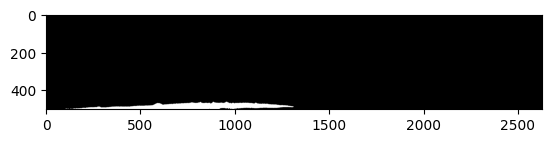

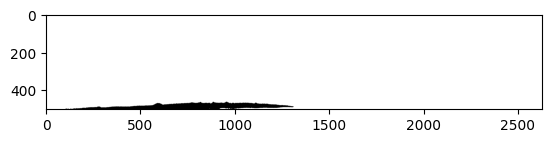

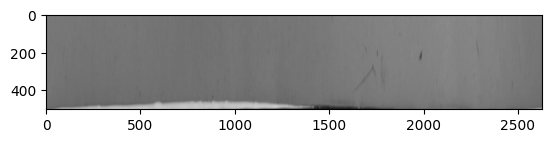

In [72]:
img = cv2.imread('/Users/gwonsmpro/Documents/GitHub/Utils/testfolder/bcd_0.png')
gray = cv2.imread('/Users/gwonsmpro/Documents/GitHub/Utils/testfolder/bcd_0.png', 0)

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
projection_h = np.sum(gray, axis=1, dtype=np.int64)
peak_h = np.diff(projection_h)


mini = min(peak_h.argmin(), peak_h.argmax())
maxi = max(peak_h.argmin(), peak_h.argmax())

print(mini, maxi)

crop_image_color = image[mini-100:mini, :, :]
crop_image_color = cv2.resize(crop_image_color, (crop_image_color.shape[1], crop_image_color.shape[0]*5))

# 흰색에 가까운 색상 범위 정의
lower_white = np.array([170, 170, 170], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

# 흰색에 가까운 픽셀 마스크 생성
white_mask = cv2.inRange(crop_image_color, lower_white, upper_white)

# 흰색에 가까운 픽셀만 이진화 (Otsu 적용)
_, white_binary = cv2.threshold(white_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 흰색에 가까운 픽셀 이진화 이미지
plt.imshow(white_binary, cmap='gray')
plt.show()

# 흰색에 가까운 픽셀을 제외한 나머지 픽셀 이진화 (Otsu 적용)
non_white_mask = cv2.bitwise_not(white_mask)
_, non_white_binary = cv2.threshold(non_white_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 흰색에 가까운 픽셀을 제외한 이진화 이미지
plt.imshow(non_white_binary, cmap='gray')
plt.show()

plt.imshow(crop_image_color)
plt.show()

# plt.imshow(img)
# plt.show()

In [ ]:
np.where(non_white_binary == 0)

In [ ]:
x_min,x_max = min(np.where(non_white_binary == 0)[0]), max(np.where(non_white_binary ==0)[0])
y_min,y_max = 